In [113]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [114]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_1.csv")

In [115]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 0
    elif result == "H":
        return 1
    elif result == "A":
        return 2
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [116]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
4891,14.05.2022,Mainz,Ein Frankfurt,2,2,0,1,2,A,13,...,2,-2,1,-1,2,-1,0,0,849,844
4892,14.05.2022,M'gladbach,Hoffenheim,5,1,1,3,1,H,19,...,4,0,1,-5,1,-1,2,-4,877,855
4893,14.05.2022,Stuttgart,FC Koln,2,1,1,1,0,H,24,...,2,-1,0,-1,1,-1,0,0,734,762
4894,14.05.2022,Union Berlin,Bochum,3,2,1,2,0,H,17,...,3,-1,2,-2,2,0,2,-1,746,389
4895,14.05.2022,Wolfsburg,Bayern Munich,2,2,0,1,2,A,10,...,1,-1,2,-2,1,0,2,-2,825,1118


In [117]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
FTHG,1.000000,-0.115890,-0.158417,0.691083,-0.066105,0.282759,-0.121474,0.529431,-0.122165,-0.110952,-0.079891,0.024723,-0.068897,-0.128651,0.020357,-0.084379,0.065876,0.192706,-0.072156,0.928358,0.104481,-0.126147,-0.899074,0.141632,0.051932,-0.066842,-0.048490,0.165839,-0.045698
FTAG,-0.115890,1.000000,0.464526,-0.077238,0.681759,-0.110333,0.297404,-0.118181,0.534106,-0.010506,-0.051651,-0.042649,0.063109,0.091277,-0.060410,0.134629,-0.058063,-0.050974,0.172909,-0.108278,-0.900764,0.872638,0.125409,-0.040003,-0.039773,0.115151,0.035588,-0.028324,0.149921
FTR,-0.158417,0.464526,1.000000,-0.119945,0.291566,-0.090089,0.148044,-0.111597,0.261484,-0.008017,-0.042539,-0.037080,0.027992,0.016190,-0.069442,0.069038,-0.064325,-0.042381,0.092592,-0.123275,-0.445752,0.418419,0.141040,-0.029907,-0.043606,0.064291,0.033294,-0.028521,0.078590
HTHG,0.691083,-0.077238,-0.119945,1.000000,-0.078063,0.126746,-0.059225,0.339639,-0.082490,-0.049028,-0.053229,-0.037902,-0.006581,-0.111528,0.013452,-0.029325,0.020904,0.128916,-0.044013,0.645407,0.078543,-0.081372,-0.612730,0.104650,0.039166,-0.038659,-0.015683,0.110668,-0.026036
HTAG,-0.066105,0.681759,0.291566,-0.078063,1.000000,-0.017061,0.147804,-0.047770,0.331774,0.001003,-0.007671,0.032551,-0.000917,0.075908,-0.053471,0.064540,-0.000982,-0.027334,0.134705,-0.063344,-0.606669,0.598045,0.078990,-0.015087,-0.018007,0.086451,0.021355,-0.012253,0.119304
HS,0.282759,-0.110333,-0.090089,0.126746,-0.017061,1.000000,-0.316971,0.664345,-0.199804,-0.120852,0.039524,0.508935,-0.254611,-0.121168,0.055733,-0.103701,0.095520,0.063736,-0.189992,0.272917,0.093084,-0.140922,-0.256431,0.126892,0.059543,-0.108198,-0.041782,0.060764,-0.186795
AS,-0.121474,0.297404,0.148044,-0.059225,0.147804,-0.316971,1.000000,-0.199331,0.676266,0.064472,-0.076242,-0.244556,0.486411,0.108685,-0.061900,0.097864,-0.082758,-0.122667,0.106571,-0.125573,-0.256728,0.279938,0.128215,-0.092458,-0.077107,0.100707,0.055362,-0.118995,0.103004
HST,0.529431,-0.118181,-0.111597,0.339639,-0.047770,0.664345,-0.199331,1.000000,-0.087377,-0.052120,0.032089,0.311088,-0.159436,-0.116918,0.036144,-0.086779,0.089747,0.016793,-0.235931,0.498386,0.100998,-0.139105,-0.469711,0.136727,0.074331,-0.098489,-0.043370,0.005260,-0.223890
AST,-0.122165,0.534106,0.261484,-0.082490,0.331774,-0.199804,0.676266,-0.087377,1.000000,0.064358,-0.023169,-0.145561,0.322492,0.098727,-0.067452,0.092219,-0.059565,-0.153934,0.055267,-0.117509,-0.480846,0.467809,0.129396,-0.065488,-0.059450,0.087395,0.050601,-0.142572,0.044197
HF,-0.110952,-0.010506,-0.008017,-0.049028,0.001003,-0.120852,0.064472,-0.052120,0.064358,1.000000,0.350923,-0.083828,0.012621,0.322449,0.097079,0.076233,0.059689,-0.444572,-0.368586,-0.138452,-0.000261,-0.023892,0.092007,-0.142493,-0.055674,-0.027370,0.000638,-0.442940,-0.367831


In [118]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld"]]

correlation_matrix_match_data_reduced = match_data_reduced.corr()
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG,HomeEloOld,AwayEloOld,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld
FTR,1.000000,-0.158417,0.464526,-0.028521,0.078590,-0.029907,-0.043606,0.064291,0.033294
FTHG,-0.158417,1.000000,-0.115890,0.165839,-0.045698,0.141632,0.051932,-0.066842,-0.048490
FTAG,0.464526,-0.115890,1.000000,-0.028324,0.149921,-0.040003,-0.039773,0.115151,0.035588
HomeEloOld,-0.028521,0.165839,-0.028324,1.000000,0.668087,0.216021,0.049508,0.028283,-0.019703
AwayEloOld,0.078590,-0.045698,0.149921,0.668087,1.000000,0.052028,-0.025494,0.217028,0.066102
HomeAttackOld,-0.029907,0.141632,-0.040003,0.216021,0.052028,1.000000,0.138647,0.011529,0.012026
HomeDefendOld,-0.043606,0.051932,-0.039773,0.049508,-0.025494,0.138647,1.000000,0.004358,0.016697
AwayAttackOld,0.064291,-0.066842,0.115151,0.028283,0.217028,0.011529,0.004358,1.000000,0.104514
AwayDefendOld,0.033294,-0.048490,0.035588,-0.019703,0.066102,0.012026,0.016697,0.104514,1.000000


In [152]:
X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [121]:
clf.predict(X_test)

array([1, 1, 1, ..., 0, 2, 1], dtype=int64)

In [122]:
result = clf.score(X_test, y_test)

In [123]:
result

0.4034653465346535

In [124]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

### Ensemble Learning

In [277]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn import linear_model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [278]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]

In [279]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [280]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = cross_val_score(model,
                             X,
                             y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores

>lr 0.493 (0.009)
>lda 0.492 (0.009)
>knn 0.418 (0.013)
>cart 0.390 (0.016)
>svm 0.487 (0.008)
>bayes 0.476 (0.011)


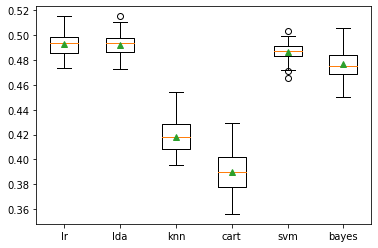

In [281]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Stack the single models to a combination

In [282]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('lda', LinearDiscriminantAnalysis()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [283]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


>lr 0.493 (0.009)
>lda 0.492 (0.009)
>knn 0.418 (0.013)
>cart 0.389 (0.015)
>svm 0.487 (0.008)
>bayes 0.476 (0.011)
>stacking 0.494 (0.011)


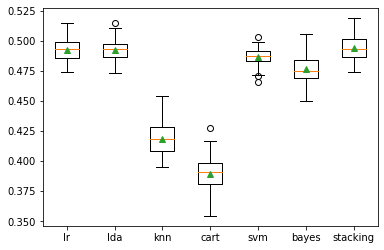

In [284]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Neural Network

In [285]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [286]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)


(3280, 6)
(1616, 6)


In [287]:
y_train

,FTR
2970,0
4026,2
1774,1
3182,2
4473,1
...,...
4426,1
466,1
3092,0
3772,2


In [288]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

3


In [289]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [290]:
# build the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
103/103 [==============================] - 1s 1ms/step - loss: 6.2690 - accuracy: 0.3583
Epoch 2/20
103/103 [==============================] - 0s 1ms/step - loss: 1.7084 - accuracy: 0.4171
Epoch 3/20
103/103 [==============================] - 0s 1ms/step - loss: 1.3321 - accuracy: 0.4029
Epoch 4/20
103/103 [==============================] - 0s 1ms/step - loss: 1.7268 - accuracy: 0.4009
Epoch 5/20
103/103 [==============================] - 0s 935us/step - loss: 1.1485 - accuracy: 0.4490
Epoch 6/20
103/103 [==============================] - 0s 921us/step - loss: 1.1499 - accuracy: 0.4452
Epoch 7/20
103/103 [==============================] - 0s 968us/step - loss: 1.1071 - accuracy: 0.4599
Epoch 8/20
103/103 [==============================] - 0s 894us/step - loss: 1.0912 - accuracy: 0.4572
Epoch 9/20
103/103 [==============================] - 0s 1ms/step - loss: 1.1719 - accuracy: 0.4460
Epoch 10/20
103/103 [==============================] - 0s 1ms/step - loss: 1.1330 - accuracy

In [291]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.4948170781135559% 
 Error on training data: 0.5051829218864441
Accuracy on test data: 0.4733910858631134% 
 Error on test data: 0.5266089141368866
